# 🧠 Introduction to Feature Selection

## 📌 What is Feature Selection?

**Feature selection** is the process of **automatically or manually choosing a subset** of the most relevant features (input variables or columns) from your original dataset for use in model construction.

### ✅ Key Steps:

- **Identifying Relevant Features:**  
  These are the variables that have a strong, meaningful relationship with the **output variable** you are trying to predict.

- **Discarding Irrelevant or Redundant Features:**
  - **Irrelevant Features:** Have no relationship with the output (e.g., a `Student_ID` number when predicting exam scores).
  - **Redundant Features:** Are highly correlated with another feature and don't provide new information (e.g., having both `area_in_sq_feet` and `area_in_sq_meters`).

🎯 **Goal:** Simplify the model **without significantly sacrificing performance**.

---

## 💡 Why is Feature Selection Important?

### 🚀 1. Improves Model Performance
- By removing irrelevant data (**noise**), the model can focus on the true underlying patterns.
- This often leads to **higher accuracy**.

---

### 🔒 2. Reduces Overfitting
- **Overfitting** occurs when a model learns the details and noise of the training data too well, performing poorly on new data.
- **Fewer features = simpler model**, which is less likely to overfit.

📊 **Analogy:**  
Instead of memorizing answers to specific practice questions (**overfitting**), you learn the core concepts (**generalizable patterns**).

---

### 👓 3. Enhances Interpretability
- A model with **10 important features** is easier to understand, explain, and trust than one with **500 features**.
- This is critical for **stakeholders** and for **debugging**.

---

### ⚡ 4. Increases Computational Efficiency
- Fewer features → **less memory usage** and **faster training** times.
- Especially crucial for **large datasets**.

---

## 🛠️ When to Use Feature Selection?

### 📊 1. High-Dimensional Data (Curse of Dimensionality)
- When there are **thousands of features** (e.g., genes in bioinformatics, pixels in images).
- As dimensions increase, data becomes **sparse**, and model performance may degrade.
- Feature selection is **essential** in these cases.

---

### 🔁 2. Correlated Features (Multicollinearity)
- When two or more features are **highly correlated**, they can distort the model and make it **unstable**.
- Feature selection removes these **redundant** features.

---

### ⚙️ 3. Reducing Complexity
- Use feature selection when aiming for a **simpler, faster, and more interpretable model**, even if the dataset isn't extremely large.
- It's a core step in the **model simplification process**.

---


## 🔍 Techniques for Feature Selection

Feature selection methods are generally grouped into **three main categories**:
1. **Filter Methods** – Fast, statistical approaches applied before model training.  
2. **Wrapper Methods** – Iterative, model-based techniques that evaluate feature subsets.  
3. **Embedded Methods** – Integrated into the model training process itself.

Each approach has different trade-offs between **speed**, **accuracy**, and **computational cost**.

---

### 🧪 1. Filter Methods

**Definition:**  
Filter methods evaluate the relevance of features by measuring their **statistical relationship with the target variable** — *independent of any machine learning model*. They are usually the **first step** in feature selection due to their simplicity and speed.

#### ✅ Pros:
- Very **fast and scalable** (good for high-dimensional data).
- Do **not require a model** to run.
- Help identify obvious irrelevant features early.

#### ❌ Cons:
- Ignore **feature interactions** (each feature is evaluated independently).
- May keep redundant features if both are correlated with the target.

---

#### 📊 Common Techniques

##### 1. Correlation Coefficient
- Measures how strongly a feature is linearly related to the target.
- Common metrics: Pearson (for continuous), Spearman (for ordinal), Chi-square (for categorical).

**Example (Pearson Correlation):**

```python
import pandas as pd

# Calculate correlations with target
correlations = df.corr()['target'].abs().sort_values(ascending=False)
print(correlations)


In [14]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.feature_selection import mutual_info_regression
data = load_diabetes()

In [15]:
df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

In [16]:
print(df.head())
print(df.info())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp

In [17]:
correlation_matrix = df.corr()

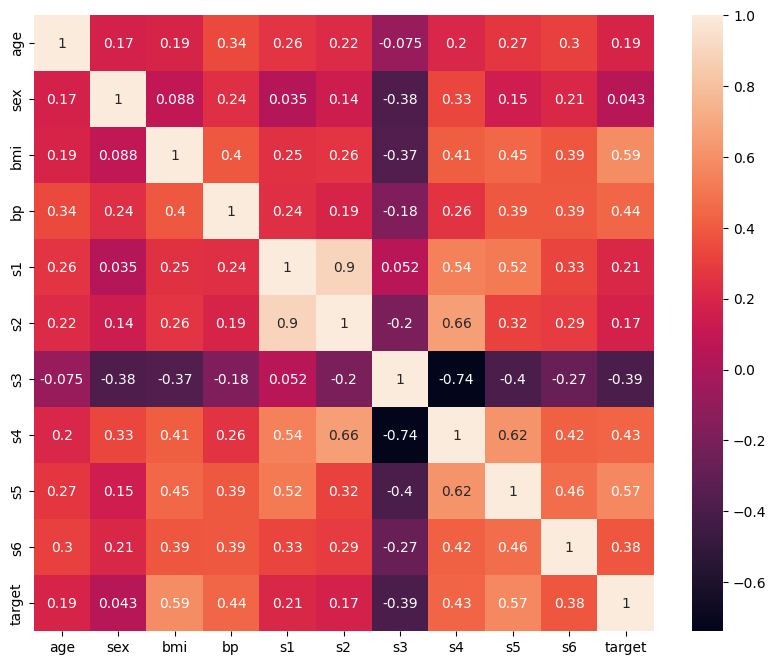

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [19]:
correlated_features = correlation_matrix['target'].sort_values(ascending=False)

In [20]:
correlated_features

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [21]:
X = df.drop(columns = ['target'])
y = df['target']

In [22]:
mutual_info = mutual_info_regression(X, y)

In [27]:
mi_df = pd.DataFrame({'Feature:': X.columns, "Mutual Information": mutual_info})

In [28]:
mi_df = mi_df.sort_values(by = "Mutual Information", ascending = False)

In [29]:
print("Mutual Information Scores:")
print(mi_df)

Mutual Information Scores:
  Feature:  Mutual Information
2      bmi            0.179854
8       s5            0.153060
9       s6            0.100182
7       s4            0.088830
4       s1            0.064378
3       bp            0.059573
6       s3            0.058572
1      sex            0.040255
5       s2            0.013636
0      age            0.004907


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

In [33]:
importance_df = importance_df.sort_values(by = 'Importance', ascending=False)

In [34]:
print(importance_df)

  Feature  Importance
8      s5    0.315629
2     bmi    0.276249
3      bp    0.087085
9      s6    0.070775
0     age    0.057496
5      s2    0.055368
6      s3    0.051191
4      s1    0.047251
7      s4    0.027056
1     sex    0.011901
